DATA 601 Project 2
Exploration of NBA player stats and fantasy basketball

Data from: https://www.nbastuffer.com/

Links of data sources:

https://www.nbastuffer.com/2024-2025-nba-player-stats/

https://www.nbastuffer.com/2023-2024-nba-player-stats/

https://www.nbastuffer.com/2022-2023-nba-player-stats/

https://www.nbastuffer.com/2021-2022-nba-player-stats/

***NOTE Numbers for the regression analysis are likely to change as the 2024-25 season is ongoing and data will be updated***

In [1]:
import pandas as pd
import string

***
DATA ACQUISITION AND CLEANING
***

Load in the data

In [2]:
#links to data
url1 = "https://www.nbastuffer.com/2024-2025-nba-player-stats/"
url2 = "https://www.nbastuffer.com/2023-2024-nba-player-stats/"
url3 = "https://www.nbastuffer.com/2022-2023-nba-player-stats/"
url4 = "https://www.nbastuffer.com/2021-2022-nba-player-stats/"

#load in data from html
df1 = pd.read_html(url1)
df2 = pd.read_html(url2)
df3 = pd.read_html(url3)
df4 = pd.read_html(url4)

Assign the tables to dataframes from lists that read html returns

In [3]:
#correct (regular season stats) table is first (so use index 0) for 2024, 2022, and 2021 data 
#for 2023 playoff stats table is before the regular season stats so use index 1 to get correct table
df1 = df1[0]
df2 = df2[1]
df3 = df3[0]
df4 = df4[0]

View dataframes

In [4]:
df1

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,LeBron James,Lal,F,39.9,13,35.4,27.4,17.8,66,...,9.2,0.7,0.5,3.6,31.9,32.5,41.2,13.9,119.6,113.7
1,NaN,Chris Paul,San,G,39.5,14,28.3,16.0,20.2,17,...,8.4,1.4,0.1,2.0,14.1,18.8,22.5,9.7,128.1,108.7
2,NaN,Kyle Lowry,Phi,G,38.7,13,24.2,11.5,14.8,19,...,3.4,1.2,0.4,0.8,8.4,9.5,11.8,5.9,119.2,110.5
3,NaN,Kevin Durant,Pho,F,36.1,9,38.8,27.2,15.7,55,...,3.4,0.8,1.4,3.3,34.1,31.0,37.6,8.8,116.6,113.3
4,NaN,Al Horford,Bos,C-F,38.5,12,27.0,13.0,13.6,4,...,2.3,1.0,0.7,1.1,14.8,11.8,17.2,7.2,128.6,108.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,NaN,JT Thor,Cle,F,22.2,1,1.6,27.2,0.0,0,...,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0
469,NaN,Trendon Watford,Bro,G-F,24.0,1,13.4,16.2,22.5,2,...,3.0,0.0,0.0,1.0,7.0,7.0,10.0,9.9,110.6,112.3
470,NaN,Mo Bamba,Lac,C,26.5,2,11.3,21.5,9.7,3,...,0.5,1.5,0.0,0.5,11.0,6.5,11.5,8.7,118.6,84.0
471,NaN,Kobe Bufkin,Atl,G,21.2,1,12.3,26.2,0.0,2,...,0.0,0.0,0.0,0.0,6.0,5.0,6.0,0.0,74.3,98.4


In [5]:
df2

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,LeBron James,Lal,F,39.3,71,35.3,29.1,16.1,404,...,8.3,1.3,0.5,3.4,33.0,34.0,41.3,13.1,119.7,113.4
1,NaN,Chris Paul,Gol,G,38.9,58,26.4,15.6,14.0,52,...,6.8,1.2,0.1,1.3,13.1,16.0,19.8,9.5,123.7,110.5
2,NaN,Kyle Lowry,Mia,G,38.1,37,28.0,13.4,17.7,42,...,4.0,1.1,0.4,1.4,11.6,12.2,15.6,6.9,115.8,105.7
3,NaN,P.J. Tucker,Phi,F,38.9,3,22.1,4.6,28.6,0,...,0.0,1.0,0.7,0.7,6.7,2.0,6.7,0.0,87.1,100.6
4,NaN,P.J. Tucker,Lac,F,38.9,28,15.0,5.5,11.7,3,...,0.6,0.5,0.2,0.2,4.2,2.2,4.8,3.6,122.7,108.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,NaN,RaiQuan Gray,San,F,24.8,3,13.0,19.5,5.6,0,...,2.0,0.3,0.3,0.3,10.0,9.7,12.0,10.1,135.5,121.0
653,NaN,David Duke Jr.,San,G,24.5,4,12.9,18.3,14.0,3,...,1.3,0.5,0.0,0.8,9.0,7.8,10.3,8.6,121.9,111.2
654,NaN,Jamaree Bouyea,San,G,24.8,3,12.6,9.0,12.5,0,...,1.0,0.3,0.0,0.3,6.7,4.7,7.7,7.1,141.0,98.8
655,NaN,Jack White,Mem,F,26.7,4,15.9,12.1,11.1,0,...,0.3,1.0,0.3,0.5,4.5,1.8,4.8,2.8,54.1,112.2


In [6]:
df3

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Precious Achiuwa,Tor,F,23.6,55,20.7,19.3,12.7,124,...,0.9,0.6,0.5,1.1,15.2,10.1,16.1,7.1,112.3,106.9
1,NaN,Steven Adams,Mem,C,29.7,42,27.0,14.6,23.1,129,...,2.3,0.9,1.1,1.9,20.1,10.9,22.5,9.0,118.1,103.2
2,NaN,Bam Adebayo,Mia,C-F,25.7,75,34.6,25.3,14.4,402,...,3.2,1.2,0.8,2.5,29.6,23.6,32.8,9.8,116.0,105.6
3,NaN,Ochai Agbaji,Uta,G,23.0,59,20.5,15.8,9.6,69,...,1.1,0.3,0.3,0.7,9.9,9.1,11.1,5.1,114.5,114.4
4,NaN,Santi Aldama,Mem,F-C,22.2,77,21.8,16.0,10.3,144,...,1.3,0.6,0.6,0.8,13.9,10.3,15.1,7.0,120.0,105.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,NaN,Mac McClung,Phi,G,24.3,2,20.6,27.4,12.9,5,...,4.5,0.0,0.0,1.5,17.5,17.0,22.0,12.7,119.3,109.9
605,NaN,Louis King,Phi,F,24.0,1,28.8,24.0,13.3,1,...,2.0,1.0,0.0,2.0,24.0,22.0,26.0,7.5,125.8,103.2
606,NaN,RaiQuan Gray,Bro,F,23.8,1,35.1,21.3,24.3,2,...,7.0,0.0,1.0,4.0,25.0,23.0,32.0,11.4,116.4,103.4
607,NaN,Jacob Gilyard,Mem,G,24.7,1,40.8,5.1,40.0,0,...,7.0,3.0,0.0,2.0,7.0,10.0,14.0,4.3,107.4,106.5


In [7]:
df4

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,NaN,Precious Achiuwa,Tor,F,22.56,73,23.6,49.2,18.5,11.3,...,6.5,14.9,1.1,6.9,0.51,0.56,1.15,6.8,105.4,104.0
1,NaN,Steven Adams,Mem,C,28.73,76,26.3,54.8,12.0,19.6,...,10.0,19.9,3.4,16.1,0.87,0.79,1.51,9.4,124.7,103.9
2,NaN,Bam Adebayo,Mia,C-F,24.73,56,32.6,67.9,25.0,14.4,...,10.1,17.5,3.4,17.5,1.43,0.79,2.64,10.7,117.2,98.2
3,NaN,Santi Aldama,Mem,F-C,21.25,32,11.2,23.4,18.5,9.9,...,2.7,12.6,0.7,7.7,0.19,0.31,0.50,7.1,101.1,103.9
4,NaN,LaMarcus Aldridge,Bro,C-F,36.73,47,22.3,46.5,22.4,8.0,...,5.5,13.4,0.9,6.3,0.30,1.00,0.94,7.2,119.6,108.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,NaN,Thaddeus Young,Tor,F,33.80,26,18.3,38.1,16.0,12.4,...,4.4,13.0,1.7,13.6,1.19,0.42,0.85,7.9,112.8,102.0
712,NaN,Trae Young,Atl,G,23.56,76,34.9,72.7,34.4,14.5,...,3.7,5.9,9.7,46.8,0.96,0.09,3.99,11.5,119.5,114.3
713,NaN,Omer Yurtseven,Mia,C,23.81,56,12.6,26.3,19.8,13.0,...,5.3,23.6,0.9,11.0,0.30,0.36,0.73,9.3,113.3,94.7
714,NaN,Cody Zeller,Por,F-C,29.51,27,13.1,27.4,16.0,14.6,...,4.6,19.3,0.8,9.4,0.30,0.22,0.70,8.2,128.3,101.8


Add a label for which season (for purposes of regression later)

In [8]:
#season start 2024 for first table
df1['Season Start Year'] = 2024
#2023 for second table etc
df2['Season Start Year'] = 2023
df3['Season Start Year'] = 2022
df4['Season Start Year'] = 2021

In [9]:
#see how many rows and columns
print('df1 rows:',len(df1.index),'columns', len(df1.columns))
print('df2 rows:',len(df2.index),'columns', len(df2.columns))
print('df3 rows:',len(df3.index),'columns', len(df3.columns))
print('df4 rows:',len(df4.index),'columns', len(df4.columns))

df1 rows: 473 columns 30
df2 rows: 657 columns 30
df3 rows: 609 columns 30
df4 rows: 716 columns 30


Check columns and data types for each column

In [10]:
df1.dtypes

RANK                 float64
NAME                  object
TEAM                  object
POS                   object
AGE                  float64
GP                     int64
MPG                  float64
USG%                 float64
TO%                  float64
FTA                    int64
FT%                  float64
2PA                    int64
2P%                  float64
3PA                    int64
3P%                  float64
eFG%                 float64
TS%                  float64
PPG                  float64
RPG                  float64
APG                  float64
SPG                  float64
BPG                  float64
TPG                  float64
P+R                  float64
P+A                  float64
P+R+A                float64
VI                   float64
ORtg                 float64
DRtg                 float64
Season Start Year      int64
dtype: object

In [11]:
df2.dtypes

RANK                 float64
NAME                  object
TEAM                  object
POS                   object
AGE                  float64
GP                     int64
MPG                  float64
USG%                 float64
TO%                  float64
FTA                    int64
FT%                  float64
2PA                    int64
2P%                  float64
3PA                    int64
3P%                  float64
eFG%                 float64
TS%                  float64
PPG                  float64
RPG                  float64
APG                  float64
SPG                  float64
BPG                  float64
TPG                  float64
P+R                  float64
P+A                  float64
P+R+A                float64
VI                   float64
ORtg                 float64
DRtg                 float64
Season Start Year      int64
dtype: object

In [12]:
df3.dtypes

RANK                 float64
NAME                  object
TEAM                  object
POS                   object
AGE                  float64
GP                     int64
MPG                  float64
USG%                 float64
TO%                  float64
FTA                    int64
FT%                  float64
2PA                    int64
2P%                  float64
3PA                    int64
3P%                  float64
eFG%                 float64
TS%                  float64
PPG                  float64
RPG                  float64
APG                  float64
SPG                  float64
BPG                  float64
TPG                  float64
P+R                  float64
P+A                  float64
P+R+A                float64
VI                   float64
ORtg                 float64
DRtg                 float64
Season Start Year      int64
dtype: object

In [13]:
df4.dtypes

RANK                                                                                                                                                                                                                         float64
FULL NAME                                                                                                                                                                                                                     object
TEAM                                                                                                                                                                                                                          object
POS                                                                                                                                                                                                                           object
AGE                                                                                 

Drop non-matching and extraneous columns - rank, min%, TRP%, AST%, P+R, P+A, P+R+A

In [14]:
#drop P+R, P+A, P+R+A columns
df1 = df1.drop(['RANK','P+R','P+A','P+R+A'], axis=1)
df2 = df2.drop(['RANK','P+R','P+A','P+R+A'], axis=1)
df3 = df3.drop(['RANK','P+R','P+A','P+R+A'], axis=1)
#drop min%, TRP%, AST% columns
df4 = df4.drop(['RANK','MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',\
                'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.'\
                    ,'AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court'], axis=1)

Rename df4 to match the other 3 df naming convention

In [15]:
#rename columns to be more descriptive
names = {'FULL NAME':'NAME', 'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor':'USG%',\
         'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions':'TO%',\
            'eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA' : 'eFG%',\
                'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.':'TS%',\
                    'PPGPointsPoints per game.':'PPG', 'RPGReboundsRebounds per game.':'RPG','APGAssistsAssists per game.':'APG','SPGStealsSteals per game.':'SPG','BPGBlocksBlocks per game.':'BPG',\
                        'TOPGTurnoversTurnovers per game.':'TOPG',\
                            'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10':'VI',\
                                'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.':'ORtg',\
                                    'DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.':'DRtg',
                                    'TOPGTurnoversTurnovers per game.':'TPG'}
df4 = df4.rename(columns=names)

In [16]:
df1.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,LeBron James,Lal,F,39.9,13,35.4,27.4,17.8,66,0.758,...,23.3,8.6,9.2,0.7,0.5,3.6,13.9,119.6,113.7,2024
1,Chris Paul,San,G,39.5,14,28.3,16.0,20.2,17,1.000,...,10.4,3.7,8.4,1.4,0.1,2.0,9.7,128.1,108.7,2024
2,Kyle Lowry,Phi,G,38.7,13,24.2,11.5,14.8,19,0.789,...,6.2,2.2,3.4,1.2,0.4,0.8,5.9,119.2,110.5,2024
3,Kevin Durant,Pho,F,36.1,9,38.8,27.2,15.7,55,0.836,...,27.6,6.6,3.4,0.8,1.4,3.3,8.8,116.6,113.3,2024
4,Al Horford,Bos,C-F,38.5,12,27.0,13.0,13.6,4,1.000,...,9.4,5.4,2.3,1.0,0.7,1.1,7.2,128.6,108.5,2024


In [17]:
df2.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,LeBron James,Lal,F,39.3,71,35.3,29.1,16.1,404,0.750,...,25.7,7.3,8.3,1.3,0.5,3.4,13.1,119.7,113.4,2023
1,Chris Paul,Gol,G,38.9,58,26.4,15.6,14.0,52,0.827,...,9.2,3.9,6.8,1.2,0.1,1.3,9.5,123.7,110.5,2023
2,Kyle Lowry,Mia,G,38.1,37,28.0,13.4,17.7,42,0.833,...,8.2,3.5,4.0,1.1,0.4,1.4,6.9,115.8,105.7,2023
3,P.J. Tucker,Phi,F,38.9,3,22.1,4.6,28.6,0,0.000,...,2.0,4.7,0.0,1.0,0.7,0.7,0.0,87.1,100.6,2023
4,P.J. Tucker,Lac,F,38.9,28,15.0,5.5,11.7,3,1.000,...,1.6,2.5,0.6,0.5,0.2,0.2,3.6,122.7,108.4,2023


In [18]:
df3.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,Precious Achiuwa,Tor,F,23.6,55,20.7,19.3,12.7,124,0.702,...,9.2,6.0,0.9,0.6,0.5,1.1,7.1,112.3,106.9,2022
1,Steven Adams,Mem,C,29.7,42,27.0,14.6,23.1,129,0.364,...,8.6,11.5,2.3,0.9,1.1,1.9,9.0,118.1,103.2,2022
2,Bam Adebayo,Mia,C-F,25.7,75,34.6,25.3,14.4,402,0.806,...,20.4,9.2,3.2,1.2,0.8,2.5,9.8,116.0,105.6,2022
3,Ochai Agbaji,Uta,G,23.0,59,20.5,15.8,9.6,69,0.812,...,7.9,2.0,1.1,0.3,0.3,0.7,5.1,114.5,114.4,2022
4,Santi Aldama,Mem,F-C,22.2,77,21.8,16.0,10.3,144,0.750,...,9.0,4.8,1.3,0.6,0.6,0.8,7.0,120.0,105.8,2022


In [19]:
df4.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,Precious Achiuwa,Tor,F,22.56,73,23.6,18.5,11.3,131,0.595,...,9.1,6.5,1.1,0.51,0.56,1.15,6.8,105.4,104.0,2021
1,Steven Adams,Mem,C,28.73,76,26.3,12.0,19.6,199,0.543,...,6.9,10.0,3.4,0.87,0.79,1.51,9.4,124.7,103.9,2021
2,Bam Adebayo,Mia,C-F,24.73,56,32.6,25.0,14.4,340,0.753,...,19.1,10.1,3.4,1.43,0.79,2.64,10.7,117.2,98.2,2021
3,Santi Aldama,Mem,F-C,21.25,32,11.2,18.5,9.9,32,0.625,...,4.1,2.7,0.7,0.19,0.31,0.50,7.1,101.1,103.9,2021
4,LaMarcus Aldridge,Bro,C-F,36.73,47,22.3,22.4,8.0,102,0.873,...,12.9,5.5,0.9,0.30,1.00,0.94,7.2,119.6,108.8,2021


Check for null values of names - stats might have null values so skip checking those, acceptable since might not be applicable (ex: not enough play time for ORTG)

In [20]:
#check for nulls in the name column
df1['NAME'].isnull().any()

False

In [21]:
df2['NAME'].isnull().any()

False

In [22]:
df3['NAME'].isnull().any()

False

In [23]:
df4['NAME'].isnull().any()

False

Check for player duplicates - duplicates may occur if a player was traded

In [24]:
#check for duplicates
df1['NAME'].duplicated().any()

False

In [25]:
df2['NAME'].duplicated().any()

True

In [26]:
df3['NAME'].duplicated().any()

True

In [27]:
df4['NAME'].duplicated().any()

True

If duplicate exists, create a new row combining stats

First check for how many unique players

In [28]:
#check how many unique players there are
unique1 = df1['NAME'].unique()
unique2 = df2['NAME'].unique()
unique3 = df3['NAME'].unique()
unique4 = df4['NAME'].unique()
print(len(unique1), len(unique2), len(unique3), len(unique4))

473 573 539 605


Then, condense

Reference for agg: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

Weighted average reference: https://www.geeksforgeeks.org/how-to-calculate-weighted-average-in-pandas/

In [29]:
#function to get weighted average, takes the dataframe, the values, and weights as params
#used when combining rows of the same player to get accurate combined stats
def weight_avg(values, weights):
    return (values * weights).sum() / weights.sum()

In [30]:
#function to aggregate variables in the case of duplicates, takes a dataframe as the param returns the condensed dataframe with players that had duplicate rows (due to playing for multiple teams) condensed into a single row
def agg_df_spec(df):
    #dictionary for how to aggregate each variable, first instance for most strings (except team which will be TOT if duplicates, else first)
    #Others are weighted averages by either games played GP or corresponding stats (ex: FTA for FT%)
    aggregate_vars = {'NAME': 'first','TEAM': lambda x: 'TOT' if len(x) > 1 else x.iloc[0],'POS':'first','AGE':'first','GP':'sum','MPG': lambda x: weight_avg(x,df.loc[x.index,'GP']),
    'USG%':lambda x: weight_avg(x,df.loc[x.index,'GP']),'TO%':lambda x: weight_avg(x,df.loc[x.index,'GP']),'FTA':'sum','FT%': lambda x: weight_avg(x,df.loc[x.index,'FTA']),
    '2PA':'sum','2P%':lambda x: weight_avg(x,df.loc[x.index,'2PA']),'3PA':'sum','3P%': lambda x: weight_avg(x,df.loc[x.index,'3PA']),'eFG%': lambda x: weight_avg(x,df.loc[x.index,'GP']),
    'TS%': lambda x: weight_avg(x,df.loc[x.index,'GP']),'PPG': lambda x: weight_avg(x,df.loc[x.index,'GP']),'RPG':lambda x: weight_avg(x,df.loc[x.index,'GP']),'APG':lambda x: weight_avg(x,df.loc[x.index,'GP']),
    'SPG':lambda x: weight_avg(x,df.loc[x.index,'GP']),'BPG':lambda x: weight_avg(x,df.loc[x.index,'GP']),'TPG':lambda x: weight_avg(x,df.loc[x.index,'GP']),'VI':lambda x: weight_avg(x,df.loc[x.index,'GP']),
    'ORtg':lambda x: weight_avg(x,df.loc[x.index,'GP']),'DRtg':lambda x: weight_avg(x,df.loc[x.index,'GP']),'Season Start Year':'first'}

    #return players that had played for multiple teams into one row, stats rounded to 2 decimals
    return df.groupby(['NAME','AGE'], as_index=False).agg(aggregate_vars).round(2)

In [31]:
#condense for each dataframe
df1 = agg_df_spec(df1)
df2 = agg_df_spec(df2)
df3 = agg_df_spec(df3)
df4 = agg_df_spec(df4)

C:\Users\kaixi\AppData\Local\Temp\ipykernel_61264\525422801.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (values * weights).sum() / weights.sum()
C:\Users\kaixi\AppData\Local\Temp\ipykernel_61264\525422801.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (values * weights).sum() / weights.sum()
C:\Users\kaixi\AppData\Local\Temp\ipykernel_61264\525422801.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (values * weights).sum() / weights.sum()
C:\Users\kaixi\AppData\Local\Temp\ipykernel_61264\525422801.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (values * weights).sum() / weights.sum()


Check dataframes - also check that number of rows matches unique players from earlier

In [32]:
df1

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,A.J. Green,Mil,G,25.1,13,17.9,13.6,8.4,2,1.00,...,7.2,1.8,0.9,0.5,0.0,0.5,5.1,128.8,112.8,2024
1,AJ Johnson,Mil,G,20.0,4,2.1,21.2,25.0,0,NaN,...,0.5,0.3,0.3,0.0,0.0,0.3,6.8,0.0,0.0,2024
2,Aaron Gordon,Den,F,29.2,7,30.3,18.1,11.3,26,0.85,...,15.4,6.7,3.1,0.7,0.3,1.3,9.0,134.2,111.9,2024
3,Aaron Holiday,Hou,G,28.1,8,9.1,15.7,11.9,7,0.71,...,4.3,0.8,1.5,0.1,0.1,0.4,7.6,137.4,107.5,2024
4,Aaron Nesmith,Ind,G-F,25.1,6,22.7,15.0,12.1,13,0.85,...,9.2,4.0,1.0,0.7,0.3,0.8,5.9,123.3,102.2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Zach Edey,Mem,C,22.5,14,20.1,20.4,17.9,33,0.67,...,11.1,6.9,0.8,0.9,1.0,1.6,7.8,118.5,94.3,2024
469,Zach LaVine,Chi,G,29.7,12,34.2,24.2,15.8,44,0.77,...,21.6,5.3,4.1,0.9,0.5,2.9,9.1,111.2,115.8,2024
470,Zeke Nnaji,Den,F-C,23.9,8,6.2,13.5,7.1,4,0.25,...,1.6,0.9,0.4,0.1,0.3,0.1,5.4,98.1,110.9,2024
471,Ziaire Williams,Bro,F,23.2,14,21.8,20.0,10.4,27,0.82,...,9.6,4.7,1.0,0.9,0.4,0.9,6.5,107.6,103.8,2024


In [33]:
df2

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,A.J. Lawson,Dal,G,23.7,42,7.4,20.0,10.3,23,0.65,...,3.2,1.2,0.5,0.2,0.1,0.3,6.7,104.7,111.8,2023
1,AJ Green,Mil,G,24.5,56,11.0,15.2,5.8,19,0.89,...,4.5,1.1,0.5,0.2,0.1,0.2,4.9,121.6,112.6,2023
2,AJ Griffin,Atl,F,20.6,20,8.5,17.3,11.4,2,1.00,...,2.4,0.9,0.3,0.1,0.1,0.4,4.1,77.0,121.7,2023
3,Aaron Gordon,Den,F,28.6,73,31.5,17.8,12.8,269,0.66,...,13.9,6.4,3.5,0.8,0.6,1.4,8.6,124.2,111.3,2023
4,Aaron Holiday,Hou,G,27.5,78,16.3,16.7,11.3,62,0.94,...,6.6,1.6,1.8,0.5,0.1,0.7,6.5,117.0,108.4,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Zach LaVine,Chi,G,29.1,25,34.9,23.8,12.1,103,0.85,...,19.5,5.1,3.9,0.8,0.3,2.1,8.4,113.3,113.4,2023
569,Zavier Simpson,Mem,G,27.2,7,23.1,17.5,15.5,4,0.75,...,6.0,2.9,3.6,1.0,0.4,1.4,6.9,86.6,111.8,2023
570,Zeke Nnaji,Den,F-C,23.3,58,9.9,15.4,15.3,62,0.68,...,3.2,2.2,0.6,0.3,0.7,0.5,6.5,112.1,102.7,2023
571,Ziaire Williams,Mem,F,22.6,51,20.3,19.7,14.9,75,0.83,...,8.2,3.5,1.5,0.7,0.2,1.3,6.9,98.6,109.6,2023


In [34]:
df3

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,A.J. Green,Mil,G,23.5,35,9.90,16.50,6.70,4,1.00,...,4.40,1.30,0.60,0.10,0.0,0.30,6.10,121.10,107.20,2022
1,A.J. Lawson,TOT,G,22.7,14,7.65,21.39,6.04,8,0.25,...,4.04,1.46,0.19,0.19,0.0,0.19,4.92,103.72,102.33,2022
2,AJ Griffin,Atl,F,19.6,72,19.50,17.80,7.30,47,0.89,...,8.90,2.10,1.00,0.60,0.2,0.60,5.40,115.60,114.80,2022
3,Aaron Gordon,Den,F,27.6,68,30.30,21.10,11.40,312,0.61,...,16.30,6.60,3.00,0.80,0.8,1.40,9.10,124.90,111.30,2022
4,Aaron Holiday,Atl,G,26.5,63,13.40,13.40,14.00,32,0.84,...,3.90,1.20,1.40,0.60,0.2,0.60,5.60,110.00,111.20,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Zach Collins,San,F-C,25.4,63,22.90,21.20,19.00,142,0.76,...,11.60,6.40,2.90,0.60,0.8,2.00,10.50,112.40,107.40,2022
535,Zach LaVine,Chi,G-F,28.1,77,36.00,28.30,12.30,428,0.85,...,24.80,4.50,4.20,0.90,0.2,2.50,8.60,115.60,111.00,2022
536,Zeke Nnaji,Den,F-C,22.2,53,13.70,15.20,13.60,62,0.64,...,5.20,2.60,0.30,0.30,0.4,0.60,4.70,120.80,103.50,2022
537,Ziaire Williams,Mem,F,21.6,37,15.20,18.00,15.90,22,0.77,...,5.70,2.10,0.90,0.40,0.2,1.00,5.80,96.50,105.60,2022


In [35]:
df4

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,Aaron Gordon,Den,F,26.57,75,31.70,19.70,12.50,230,0.74,...,15.00,5.80,2.50,0.59,0.59,1.77,7.60,115.60,109.90,2021
1,Aaron Henry,Phi,F,22.61,6,2.80,18.50,28.60,0,NaN,...,0.30,0.20,0.00,0.00,0.33,0.33,0.00,0.00,0.00,2021
2,Aaron Holiday,TOT,G,25.53,63,16.23,18.66,15.13,68,0.87,...,6.34,1.91,2.42,0.67,0.14,1.05,7.55,107.56,106.56,2021
3,Aaron Nesmith,Bos,G-F,22.49,52,11.00,17.20,13.80,26,0.81,...,3.80,1.70,0.40,0.38,0.08,0.60,5.00,95.50,97.50,2021
4,Aaron Wiggins,Okc,G-F,23.27,50,24.20,15.30,12.60,85,0.73,...,8.30,3.60,1.40,0.60,0.20,1.08,5.70,107.90,109.60,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,Chi,G-F,27.09,67,34.70,28.80,11.20,375,0.85,...,24.40,4.60,4.50,0.61,0.34,2.55,9.20,115.10,112.80,2021
601,Zavier Simpson,Okc,G,25.16,4,43.50,15.90,15.60,5,1.00,...,11.00,5.30,7.50,1.25,1.00,2.50,7.00,91.40,108.20,2021
602,Zeke Nnaji,Den,F-C,21.25,41,17.00,14.90,9.70,65,0.63,...,6.60,3.60,0.40,0.39,0.32,0.56,5.00,124.00,104.00,2021
603,Ziaire Williams,Mem,F,20.58,62,21.70,14.90,8.40,55,0.78,...,8.10,2.10,1.00,0.58,0.18,0.66,4.70,112.90,107.10,2021


Combine all the data into one dataframe

In [36]:
#combine all data into one
df_total = pd.concat([df1,df2,df3,df4])

In [37]:
#view dataframe
df_total

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,PPG,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year
0,A.J. Green,Mil,G,25.10,13,17.9,13.6,8.4,2,1.00,...,7.2,1.8,0.9,0.50,0.00,0.50,5.1,128.8,112.8,2024
1,AJ Johnson,Mil,G,20.00,4,2.1,21.2,25.0,0,NaN,...,0.5,0.3,0.3,0.00,0.00,0.30,6.8,0.0,0.0,2024
2,Aaron Gordon,Den,F,29.20,7,30.3,18.1,11.3,26,0.85,...,15.4,6.7,3.1,0.70,0.30,1.30,9.0,134.2,111.9,2024
3,Aaron Holiday,Hou,G,28.10,8,9.1,15.7,11.9,7,0.71,...,4.3,0.8,1.5,0.10,0.10,0.40,7.6,137.4,107.5,2024
4,Aaron Nesmith,Ind,G-F,25.10,6,22.7,15.0,12.1,13,0.85,...,9.2,4.0,1.0,0.70,0.30,0.80,5.9,123.3,102.2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,Chi,G-F,27.09,67,34.7,28.8,11.2,375,0.85,...,24.4,4.6,4.5,0.61,0.34,2.55,9.2,115.1,112.8,2021
601,Zavier Simpson,Okc,G,25.16,4,43.5,15.9,15.6,5,1.00,...,11.0,5.3,7.5,1.25,1.00,2.50,7.0,91.4,108.2,2021
602,Zeke Nnaji,Den,F-C,21.25,41,17.0,14.9,9.7,65,0.63,...,6.6,3.6,0.4,0.39,0.32,0.56,5.0,124.0,104.0,2021
603,Ziaire Williams,Mem,F,20.58,62,21.7,14.9,8.4,55,0.78,...,8.1,2.1,1.0,0.58,0.18,0.66,4.7,112.9,107.1,2021


Remove punctuation from names to standardize (ex: AJ and A.J. will both just be AJ)

Reference: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [38]:
#function removes punctuation from string, takes name column as param
def name_std(names):
    return names.translate(str.maketrans('', '', string.punctuation))

#remove punctation from names
df_total['NAME'] = df_total['NAME'].apply(name_std)

Add fanatsy points columns

In [39]:
#add fantasy points columns using existing stats from the dataframe - scoring is based on the ESPN fantasy scoring
df_total['Fantasy PPG'] = df_total['PPG'] + ((df_total['3PA']*df_total['3P%'])/df_total['GP']) - ((df_total['3PA']+df_total['2PA'])/df_total['GP']) +\
      (2*(((df_total['3PA']*df_total['3P%'])/df_total['GP']) + ((df_total['2PA']*df_total['2P%'])/df_total['GP'])))\
      - (df_total['FTA']/df_total['GP']) + ((df_total['FTA']*df_total['FT%'])/df_total['GP']) + df_total['RPG'] + (2*df_total['APG']) + (4*df_total['SPG']) + (4*df_total['BPG']) - (2*df_total['TPG'])

In [40]:
#round to two decimals
df_total = df_total.round(2)

In [41]:
#view dataframe after adding fantasy points
df_total

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year,Fantasy PPG
0,AJ Green,Mil,G,25.10,13,17.9,13.6,8.4,2,1.00,...,1.8,0.9,0.50,0.00,0.50,5.1,128.8,112.8,2024,13.83
1,AJ Johnson,Mil,G,20.00,4,2.1,21.2,25.0,0,NaN,...,0.3,0.3,0.00,0.00,0.30,6.8,0.0,0.0,2024,NaN
2,Aaron Gordon,Den,F,29.20,7,30.3,18.1,11.3,26,0.85,...,6.7,3.1,0.70,0.30,1.30,9.0,134.2,111.9,2024,31.46
3,Aaron Holiday,Hou,G,28.10,8,9.1,15.7,11.9,7,0.71,...,0.8,1.5,0.10,0.10,0.40,7.6,137.4,107.5,2024,8.74
4,Aaron Nesmith,Ind,G-F,25.10,6,22.7,15.0,12.1,13,0.85,...,4.0,1.0,0.70,0.30,0.80,5.9,123.3,102.2,2024,18.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,Chi,G-F,27.09,67,34.7,28.8,11.2,375,0.85,...,4.6,4.5,0.61,0.34,2.55,9.2,115.1,112.8,2021,37.70
601,Zavier Simpson,Okc,G,25.16,4,43.5,15.9,15.6,5,1.00,...,5.3,7.5,1.25,1.00,2.50,7.0,91.4,108.2,2021,32.04
602,Zeke Nnaji,Den,F-C,21.25,41,17.0,14.9,9.7,65,0.63,...,3.6,0.4,0.39,0.32,0.56,5.0,124.0,104.0,2021,13.19
603,Ziaire Williams,Mem,F,20.58,62,21.7,14.9,8.4,55,0.78,...,2.1,1.0,0.58,0.18,0.66,4.7,112.9,107.1,2021,14.21


For purposes of regression latter set these stats: USG%, TO%, FTA, FT%, 2PA, 2P%, 3PA, 3P%, eFG%, TS%, PPG, RPG, APG, SPG, BPG, TPG, Fantasy PPG that are null to zero

In [42]:
stats_tofill ={'USG%':0, 'TO%':0,'FTA':0,'FT%':0,'2PA':0,'2P%':0,'3PA':0,'3P%':0,'eFG%':0,'TS%':0,'PPG':0,'RPG':0,'APG':0,'SPG':0,'BPG':0,'TPG':0,'Fantasy PPG':0}
df_total=df_total.fillna(stats_tofill)

It is technically possible to have negative fantasy ppg average, but unlikely - check

In [43]:
#check for negative fantasy ppg players
df_total[df_total['Fantasy PPG']<0]

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,RPG,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year,Fantasy PPG
173,JD Davison,Bos,G,22.10,3,4.8,26.6,48.7,2,0.5,...,0.3,0.3,0.3,0.0,1.30,3.7,40.6,106.9,2024,-0.50
203,George King,Dal,F-G,28.24,4,4.8,16.1,14.5,2,0.5,...,1.3,0.0,0.0,0.0,0.25,0.0,16.7,87.7,2021,-0.40
276,Jaylen Morris,San,G,26.56,3,5.3,23.1,11.4,4,0.5,...,0.7,0.7,0.0,0.0,0.33,5.3,39.5,105.2,2021,-0.53


All look valid, no need to drop them

***
FOCUSED DATA VIS/EXPLORATION Section
***

Two questions focusing on are:

Can past season performance predict future performance? I predict no. 

Secondly, do injuries (proxied by limited games played) have a long-term effect on performance? I also predict that it does not.

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

Taking a look at correlations between variables and fantasy ppg

In [45]:
#dictionary to store correlation coefficients
correlations ={}

#get correlations for each numerical category with Fantasy PPG
for i in list(df_total.columns):
    if df_total[i].dtype != object:
        #print('Corr', i,'with Fanatasy PPG:', df1[i].corr(df1['Fantasy PPG']))
        correlations[i] = df_total[i].corr(df_total['Fantasy PPG'])

#view the correlation coefficients in order
sorted(correlations.items(), key=lambda x:x[1], reverse= True)

[('Fantasy PPG', 0.9999999999999999),
 ('PPG', 0.928533653919262),
 ('MPG', 0.8871131887966166),
 ('TPG', 0.8128023508239447),
 ('APG', 0.785117679543825),
 ('2PA', 0.7371641553119374),
 ('SPG', 0.712191057606214),
 ('FTA', 0.7091228107193601),
 ('RPG', 0.7006807362318959),
 ('VI', 0.6529855815257347),
 ('3PA', 0.5887871722697733),
 ('USG%', 0.5044672732483555),
 ('GP', 0.4735685035945308),
 ('FT%', 0.45923326371093365),
 ('BPG', 0.4465039937049139),
 ('ORtg', 0.44361277731347776),
 ('3P%', 0.3577412402624161),
 ('DRtg', 0.3528083242125939),
 ('TS%', 0.31884605248285836),
 ('eFG%', 0.26980230232091096),
 ('2P%', 0.20806495068916006),
 ('AGE', 0.16982092256000975),
 ('Season Start Year', -0.004118337522538474),
 ('TO%', -0.03313957326876208)]

OLS Regression Analysis

Create a lag variable for fantasy ppg to see effects of previous year on fantasy ppg performance

Reference: https://www.statology.org/pandas-lag/

In [46]:
#sort by player and year first
df_total.sort_values(by=['NAME','Season Start Year'])

#create the lag variable for fantasy ppg by player
df_total['Fantasy PPG Lag'] = df_total.groupby('NAME')['Fantasy PPG'].shift(-1)

In [47]:
#view df
df_total.sort_values(by=['NAME','Season Start Year'])

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,VI,ORtg,DRtg,Season Start Year,Fantasy PPG,Fantasy PPG Lag
0,AJ Green,Mil,G,23.5,35,9.9,16.5,6.7,4,1.00,...,0.6,0.1,0.0,0.3,6.1,121.1,107.2,2022,7.42,NaN
1,AJ Green,Mil,G,24.5,56,11.0,15.2,5.8,19,0.89,...,0.5,0.2,0.1,0.2,4.9,121.6,112.6,2023,8.08,7.42
0,AJ Green,Mil,G,25.1,13,17.9,13.6,8.4,2,1.00,...,0.9,0.5,0.0,0.5,5.1,128.8,112.8,2024,13.83,8.08
2,AJ Griffin,Atl,F,19.6,72,19.5,17.8,7.3,47,0.89,...,1.0,0.6,0.2,0.6,5.4,115.6,114.8,2022,15.84,NaN
2,AJ Griffin,Atl,F,20.6,20,8.5,17.3,11.4,2,1.00,...,0.3,0.1,0.1,0.4,4.1,77.0,121.7,2023,3.13,15.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ziaire Williams,Bro,F,23.2,14,21.8,20.0,10.4,27,0.82,...,1.0,0.9,0.4,0.9,6.5,107.6,103.8,2024,19.36,15.12
538,Zion Williamson,Nor,F,22.8,29,33.0,30.4,17.4,248,0.71,...,4.6,1.1,0.6,3.4,11.4,120.3,108.3,2022,43.52,NaN
572,Zion Williamson,Nor,F,23.8,70,31.5,29.7,15.0,494,0.70,...,5.0,1.1,0.7,2.8,11.1,118.8,108.8,2023,40.33,43.52
472,Zion Williamson,Nor,F,24.4,6,31.1,34.8,17.4,60,0.67,...,5.3,0.7,1.2,3.7,12.7,105.6,110.1,2024,36.88,40.33


Plotting lagged fantasy PPG vs fantasy PPG

<Axes: xlabel='Fantasy PPG Lag', ylabel='Fantasy PPG'>

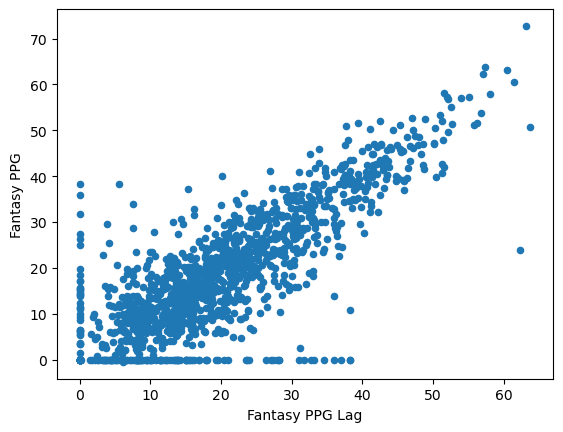

In [48]:
#plotting lag fantasy points and fantasy points
df_total.plot(x='Fantasy PPG Lag',y='Fantasy PPG', kind='scatter')

Cursory look would suggest past performance is a positive predictor of fantasy ppg

Set up OLS regression

Dependent variables (what are the predictors) are age and fantasy ppg lag

Independent (what we are predicting) is fantasy ppg

In [49]:
#independent variables for the regression
X = df_total[['AGE','Fantasy PPG Lag']]
#dependent variable for the regression
Y = df_total['Fantasy PPG']

Run the regression

Reference: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [50]:
#add intercept
X=sm.add_constant(X)

#run regression, dropping missing
reg = sm.OLS(Y,X,missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Fantasy PPG   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1314.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          1.92e-312
Time:                        19:11:29   Log-Likelihood:                -4498.0
No. Observations:                1298   AIC:                             9002.
Df Residuals:                    1295   BIC:                             9017.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.2614      1.400     

Both age and fantasy ppg lag seem to be statistically significant.

Age seems to negatively impact fantasy scoring, an extra year older is about 0.28 fantasy points less per game. Fantasy ppg lag seems to positively predict fantasy ppg - for each fantasy point per game a player scored in the year before, the player on average will score 0.89 points per game.

Lets control for games played and minutes per game

In [51]:
#add gp and mpg to controls
X = df_total[['AGE','GP','MPG','Fantasy PPG Lag']]

#add intercept
X=sm.add_constant(X)

#run regression, dropping missing
reg = sm.OLS(Y,X,missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Fantasy PPG   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1550.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:29   Log-Likelihood:                -4077.0
No. Observations:                1298   AIC:                             8164.
Df Residuals:                    1293   BIC:                             8190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.6039      1.062     

Both still seem to be significant.

However the effects are less impactful.
The effect of age changes to only -0.14 fantasy ppg for each increase in age. Past fantasy ppg effect also decreases to around 0.4 fantasy ppg for each fantsy ppg in the previous year.

There seems to be some evidence that past performance can predict future performance positively.

Lets try controlling for player variation using fixed effects

Fixed effects OLS analysis

Reference: https://stackoverflow.com/questions/24195432/fixed-effect-in-pandas-or-statsmodels

In [52]:
!pip install linearmodels

In [53]:
from linearmodels.panel import PanelOLS

References: https://bashtage.github.io/linearmodels/panel/panel/linearmodels.panel.model.PanelOLS.html

In [54]:
#set index for fixed effects by player
df = df_total.set_index(['NAME','Season Start Year'])

#run fixed effects OLS with same variables as first normal regression
fe_reg = PanelOLS(df['Fantasy PPG'],df[['AGE','Fantasy PPG Lag']], entity_effects=True).fit()
print(fe_reg.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            Fantasy PPG   R-squared:                        0.0699
Estimator:                   PanelOLS   R-squared (Between):             -11.574
No. Observations:                1298   R-squared (Within):               0.0699
Date:                Tue, Nov 19 2024   R-squared (Overall):             -9.9426
Time:                        19:11:35   Log-likelihood                   -3779.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.381
Entities:                         594   P-value                           0.0000
Avg Obs:                       2.1852   Distribution:                   F(2,702)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             26.381
                            

c:\Users\kaixi\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In the basic model with the same independent variables as the first normal OLS regression age and fantasy ppg lag seem to have negative effects on fantasy ppg. Age effects being far more prominent at -2 fantasy ppg for each year older, and past performance seeming to indicate for each fantasy ppg scored in the previous year results in -0.09 fantasy ppg.

Try with controls for games and minutes per game.

In [55]:
#run fixed effects OLS with controls for gp and mpg
fe_reg = PanelOLS(df['Fantasy PPG'],df[['AGE','Fantasy PPG Lag', 'GP','MPG']], entity_effects=True).fit()
print(fe_reg.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            Fantasy PPG   R-squared:                        0.5148
Estimator:                   PanelOLS   R-squared (Between):              0.8977
No. Observations:                1298   R-squared (Within):               0.5148
Date:                Tue, Nov 19 2024   R-squared (Overall):              0.8987
Time:                        19:11:35   Log-likelihood                   -3357.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      185.64
Entities:                         594   P-value                           0.0000
Avg Obs:                       2.1852   Distribution:                   F(4,700)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             185.64
                            

c:\Users\kaixi\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Now age becomes insiginifcant (zero effect) but past performance seems to still be significant and negative. Each fantasy PPG in the previous season leads to -0.07 in the current one.
Games played and minutes per game seem significant and have a positive impact on fantasy ppg

These results seem to indicate that past performance can predict future performance but negatively.
That said the results here are smaller magnitude. Overall, since the results do not seem to be that robust using different methods one could argue that there is not an effect or strong effect of past performance on predicting fantasy performance.

That said, with fixed effects controlling for each player's unobserved attribtues it could also be argued that if people view a player in real life as 'good players' they will likely will perform similar to expectation likewise with 'bad players' regardless of the previous year's performance.

***
So for the question: Can past season performance predict future performance? 

I would say ***at best it is a weak predictor***, but more ***likely not very predictive***.
***

Now for the question: Do injuries (proxied by limited games played) have a long-term effect on performance?

Create a variable for injuries proxied by games played and mpg

Make injury dummy variables - minor for less than 22 games missed out of 82, injury var for 22-41 games missed, and major for 42 or more games missed.
Also added requirement of averaging 10 minutes per game or more to try to eliminate the number of players that just don't play very much and better proxy for injury.
2024-25 season is excluded since the season is ongoing.

In [56]:
#create variable for minor injury (missing less than 22 games) - exclude 2024 since season not over
df_total['Minor Injury'] = ((df_total['GP'] < 70) & (df_total['GP'] > 60) & (df_total['MPG'] > 10) & (df_total['Season Start Year'] != 2024)).astype(int)

#create variable for injury (missing 22 to 41 games) - exclude 2024 since season not over
df_total['Injury'] = ((df_total['GP'] < 60) & (df_total['GP'] > 40) & (df_total['MPG'] > 10) & (df_total['Season Start Year'] != 2024)).astype(int)

#create variable for major injury (missing more than half the games in a season) - exclude 2024 since season not over
df_total['Major Injury'] = ((df_total['GP'] < 40) & (df_total['Season Start Year'] != 2024)).astype(int)

#set index for fixed effects by player
df = df_total.set_index(['NAME','Season Start Year'])

#create lagged variables for each
df_total['Minor Injury Lag'] = df_total.groupby('NAME')['Minor Injury'].shift(-1)
df_total['Major Injury Lag'] = df_total.groupby('NAME')['Major Injury'].shift(-1)
df_total['Injury Lag'] = df_total.groupby('NAME')['Injury'].shift(-1)

In [57]:
#checking df
df_total

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,DRtg,Season Start Year,Fantasy PPG,Fantasy PPG Lag,Minor Injury,Injury,Major Injury,Minor Injury Lag,Major Injury Lag,Injury Lag
0,AJ Green,Mil,G,25.10,13,17.9,13.6,8.4,2,1.00,...,112.8,2024,13.83,8.08,0,0,0,0.0,0.0,1.0
1,AJ Johnson,Mil,G,20.00,4,2.1,21.2,25.0,0,0.00,...,0.0,2024,0.00,NaN,0,0,0,NaN,NaN,NaN
2,Aaron Gordon,Den,F,29.20,7,30.3,18.1,11.3,26,0.85,...,111.9,2024,31.46,30.50,0,0,0,0.0,0.0,0.0
3,Aaron Holiday,Hou,G,28.10,8,9.1,15.7,11.9,7,0.71,...,107.5,2024,8.74,13.28,0,0,0,0.0,0.0,0.0
4,Aaron Nesmith,Ind,G-F,25.10,6,22.7,15.0,12.1,13,0.85,...,102.2,2024,18.63,25.06,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,Chi,G-F,27.09,67,34.7,28.8,11.2,375,0.85,...,112.8,2021,37.70,NaN,1,0,0,NaN,NaN,NaN
601,Zavier Simpson,Okc,G,25.16,4,43.5,15.9,15.6,5,1.00,...,108.2,2021,32.04,NaN,0,0,1,NaN,NaN,NaN
602,Zeke Nnaji,Den,F-C,21.25,41,17.0,14.9,9.7,65,0.63,...,104.0,2021,13.19,NaN,0,1,0,NaN,NaN,NaN
603,Ziaire Williams,Mem,F,20.58,62,21.7,14.9,8.4,55,0.78,...,107.1,2021,14.21,NaN,1,0,0,NaN,NaN,NaN


Run OLS regression

In [58]:
#independent variables for the regression
X = df_total[['AGE','Injury Lag','Minor Injury Lag', 'Major Injury Lag']]
#dependent variable for the regression
Y = df_total['Fantasy PPG']

#add intercept
X=sm.add_constant(X)

#run regression, dropping missing
reg = sm.OLS(Y,X,missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Fantasy PPG   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     68.79
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           7.68e-53
Time:                        19:11:35   Log-Likelihood:                -5092.2
No. Observations:                1298   AIC:                         1.019e+04
Df Residuals:                    1293   BIC:                         1.022e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.6421      2.314  

Seems like injury and major injury are significant, while minor injury is not. 
Getting an injury or injuries that cause 22-41 games missed in the previous year (injury lag variable) seems to decrease the fantasy ppg by 5 on average.
Getting a major injury or injuries that cause a player to miss 42 or more games in the previous year (major injury lag variable) seems to decrease fantasy ppg by 13 on average.

Try with fixed effects by player to remove potential unobserved bias

In [59]:
#set index for fixed effects by player
df = df_total.set_index(['NAME','Season Start Year'])

#run fixed effects OLS with same variables as first normal regression
fe_reg = PanelOLS(df['Fantasy PPG'],df[['AGE','Injury Lag','Minor Injury Lag', 'Major Injury Lag']], entity_effects=True).fit()
print(fe_reg.summary)

c:\Users\kaixi\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:            Fantasy PPG   R-squared:                        0.0742
Estimator:                   PanelOLS   R-squared (Between):             -10.596
No. Observations:                1298   R-squared (Within):               0.0742
Date:                Tue, Nov 19 2024   R-squared (Overall):             -9.0673
Time:                        19:11:35   Log-likelihood                   -3776.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.018
Entities:                         594   P-value                           0.0000
Avg Obs:                       2.1852   Distribution:                   F(4,700)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             14.018
                            

Seems like only minor injury is significant.
Getting an injury or injuries that cause 21 games or less to be missed in the previous year (minor injury lag variable) seems to increase the fantasy ppg by 1.68 on average.

That said I don't think this is likely accurate. It could be argued that fixed effects are not the best for this as it might factor in if a player is historically injury prone, making the coefficients effectively useless or just less predictive. I believe that the effect is probably closer to the first OLS regression and injuries can actually predict negatively on fantasy performance.

***
So for question two: Do injuries (proxied by limited games played) have a long-term effect on performance?

While ***not entirely convincing***, it seems that it is ***possible that injuries in the prior year can predict negatively*** on fantasy ppg performance.
***